# Notebook 05: Train ANNs

### Primary Goal: Train and evaluate the artifical neural networks 

#### Background

In the paper we start with training artifical neural networks, so we will do the same in the order of the notebooks. 

Note that the model used in the paper is included in the github repo, but for the sake of giving more experience with tensorflow, we will take you through building a similar network and training it here.

#### Step 1: Imports

In [2]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import tqdm 
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects


#outlines for text 
pe1 = [path_effects.withStroke(linewidth=1.5,
                             foreground="k")]
pe2 = [path_effects.withStroke(linewidth=1.5,
                             foreground="w")]


#plot parameters that I personally like, feel free to make these your own.
matplotlib.rcParams['axes.facecolor'] = [0.9,0.9,0.9]
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['legend.facecolor'] = 'w'
matplotlib.rcParams['savefig.transparent'] = False
%config InlineBackend.figure_format = 'retina'

#one quick thing here, we need to set the random seed so we all get the same results no matter the computer or python session 
tf.random.set_seed(43)

#### Step 2: Load data

In [3]:
#load training 
df_t = pd.read_csv('../datasets/sub-sevir-engineered/lowres_features_train.csv')
#load validation set
df_v = pd.read_csv('../datasets/sub-sevir-engineered/lowres_features_val.csv')

#make matrices for training/validation
X_t = df_t.to_numpy()[:,:36]
y_t = df_t.to_numpy()[:,36]
X_v = df_v.to_numpy()[:,:36]
y_v = df_v.to_numpy()[:,36]

#### Step 3: Make tensorflow dataset 

As we discussed in the previous notebook, we need to shuffle and batch the data. We will leverage the ```tf.data.Datasets```

In [4]:
#make datasets 
ds_train = tf.data.Dataset.from_tensor_slices((X_t,y_t))
ds_val = tf.data.Dataset.from_tensor_slices((X_v,y_v))

#shuffle only the training 
ds_train = ds_train.shuffle(ds_train.cardinality().numpy())

#batch both 
batch_size = 32
ds_train = ds_train.batch(batch_size)
ds_val = ds_val.batch(batch_size)

2022-10-31 13:18:21.444848: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Just a note on batching. Technically, we do not need to batch the validation data. The reason we batch the validation data is to save time/RAM when computing the predictions on the validation data. If your batch is too small, you could take lots of steps to compute the output. Batch too big can overwelm your RAM. So this choice will be machine dependent. 

#### Step 4: Build a model

In the paper we note that with neural networks there really is no "one shoe fits all" paradigm, where a set of default parameters can get you a good performing model. With neural networks you *need* to do some sort of hyperparameter search. So here, while we only show one model configuration, we encourage you to play around with different model configurations to do your hyperparameter sweep. In fact, we have a modular script that leverages a tensorflow api to help do these sweeps. The notebook example explaining this script is [here](#) <-- dead link right now!

Let's start simple, do a model with 2 layers with 2 neurons each and we will be conducting the classification task (0 no lightning, 1 lightning). 



In [5]:
model = tf.keras.models.Sequential([
        #input layer 
        tf.keras.layers.Dense(2,activation='relu',input_shape=(X_t.shape[1],),),
        #hidden layer 1
        tf.keras.layers.Dense(2,activation='relu'),
        #output layer 
        tf.keras.layers.Dense(1,activation='sigmoid')
        ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 74        
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


notice the following about the above definition of the model: 

1. the input layer *always* has the input_shape defined

- this is needed so the model can build the right number of weights, otherwise you can't see the summary output above. 

2. the activation functions for the input and hidden layer are 'relu' 

- by default there will be no activation (i.e., $\sigma(x) = x$), so thats why the linear regression example we showed in the last notebook there was no choice of activation. The relu is needed to do non-linear tasks with the NN. If you use no activation everywhere, things might not work out so well. 
   
3. the output layer (last layer) has a *sigmoid* activation 

- this is for the classification task. If it were the regression task you wouldnt need this (i.e., linear activation). 
- quick note, if you have more than 1 output neuron (say if you have no lightning, some lightning and lots of lightning), then you would use *softmax* instead of sigmoid. 

In order to visualize the initial performance with random weights a biases, we can plug the data through and plot a performance diagram. But first lets look at the output

(0.0, 1.0)

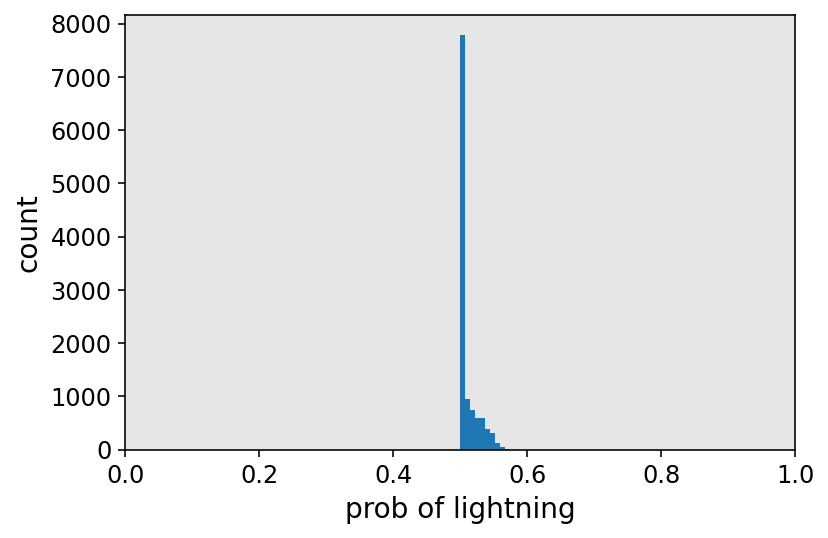

In [7]:
#like sklearn, we do .predict!
y_preds = model.predict(ds_val)

plt.hist(y_preds)
plt.xlabel('prob of lightning')
plt.ylabel('count')
plt.xlim([0,1])

You should be able to see that because of the sigmoid the data are between 0 - 1. In order to plot the performance diagram we can use some fun tensorflow pre-built metrics

In [8]:
#probability threholds 
thresh = np.arange(0.05,1.05,0.05)

#statsitcs we need for performance diagram 
tp = tf.keras.metrics.TruePositives(thresholds=thresh.tolist())
fp = tf.keras.metrics.FalsePositives(thresholds=thresh.tolist())
fn = tf.keras.metrics.FalseNegatives(thresholds=thresh.tolist())

#get performance diagram line by getting tp,fp and fn 
tp.reset_state()
fp.reset_state()
fn.reset_state()

tps = tp(y_v,y_preds)
fps = fp(y_v,y_preds)
fns = fn(y_v,y_preds)

#calc x,y of performance diagram 
pods = tps/(tps + fns)
srs = tps/(tps + fps)
csis = tps/(tps + fns + fps)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


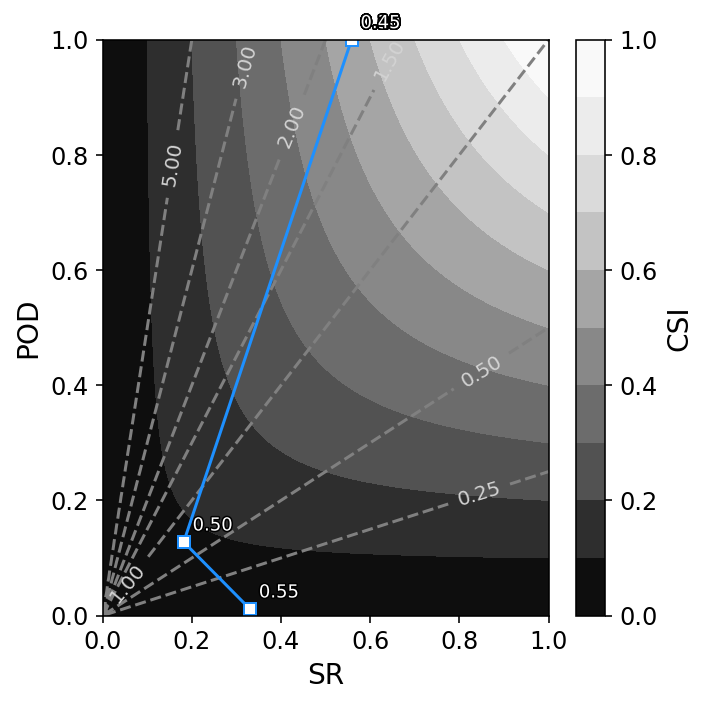

In [9]:
#import some helper functions for our other directory.
import sys
sys.path.insert(1, '../scripts/')

#load contingency_table func
from gewitter_functions import get_contingency_table,make_performance_diagram_axis,get_acc,get_pod,get_sr,csi_from_sr_and_pod

#plot it up  
ax = make_performance_diagram_axis()
ax.plot(np.asarray(srs),np.asarray(pods),'-s',color='dodgerblue',markerfacecolor='w',label='UNET')

for i,t in enumerate(thresh):
    text = np.char.ljust(str(np.round(t,2)),width=4,fillchar='0')
    ax.text(np.asarray(srs)[i]+0.02,np.asarray(pods)[i]+0.02,text,path_effects=pe1,fontsize=9,color='white')

plt.tight_layout()


As expected, things look wonky! It is an untrained model. 

Okay, let's get the model compiled and train it for 25 epochs. 

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3))

history = model.fit(ds_train,validation_data=ds_val,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 2s 794us/step - loss: 0.4991 - val_loss: 0.4118
Epoch 2/25
1875/1875 [==============================] - 1s 690us/step - loss: 0.3092 - val_loss: 0.3229
Epoch 3/25
1875/1875 [==============================] - 1s 684us/step - loss: 0.2725 - val_loss: 0.2946
Epoch 4/25
1875/1875 [==============================] - 1s 683us/step - loss: 0.2581 - val_loss: 0.2859
Epoch 5/25
1875/1875 [==============================] - 1s 683us/step - loss: 0.2514 - val_loss: 0.2727
Epoch 6/25
1875/1875 [==============================] - 1s 672us/step - loss: 0.2479 - val_loss: 0.2690
Epoch 7/25
1875/1875 [==============================] - 1s 713us/step - loss: 0.2459 - val_loss: 0.2603
Epoch 8/25
1875/1875 [==============================] - 1s 696us/step - loss: 0.2445 - val_loss: 0.2633
Epoch 9/25
1875/1875 [==============================] - 1s 699us/step - loss: 0.2435 - val_loss: 0.2692
Epoch 10/25
1875/1875 [==============================] - 1s 721u

Notice a few new things I added to the .fit command. We have added the validation data right in line with the .fit command which now adds the validation loss to the output bar as the model train. Additionally, we also set the model.fit command equal to a variable called ```history```. What this enables is we can now plot the data that is being outputed by in the text above. 

This data is very useful to determining how overfit a model might be. Let's plot the training loss vs the validation loss. 

Text(0, 0.5, 'loss')

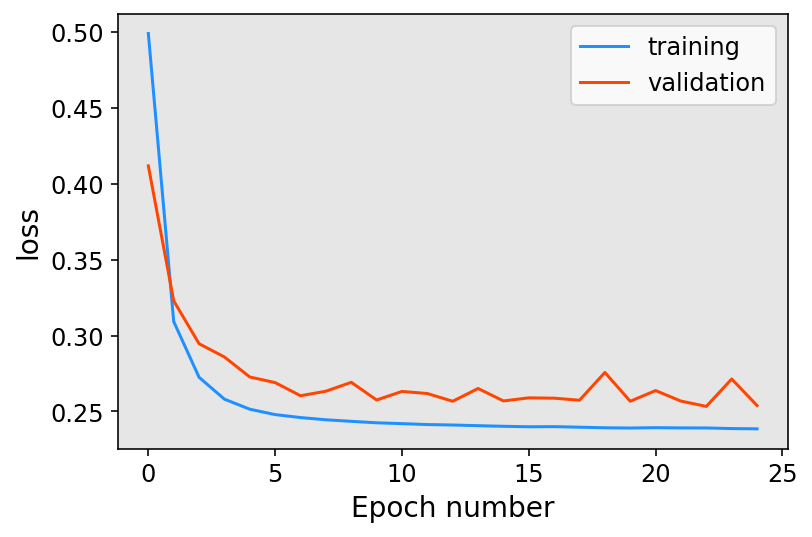

In [11]:
plt.plot(history.history['loss'],color='dodgerblue',label='training')
plt.plot(history.history['val_loss'],color='orangered',label='validation')
plt.legend()
plt.xlabel('Epoch number')
plt.ylabel('loss')

Above, you want to compare the red line to the blue line. The absolute value is less important. But notice that the red line is relatively flat after about 10 epochs. This isnt much of an overfitting signal, which would be increasing validation loss with more epochs, but it does seem to have converged to some local minimum. 

Now that the model is trained, let's check back with the new preditions and the performance diagram 

Text(0, 0.5, 'count')

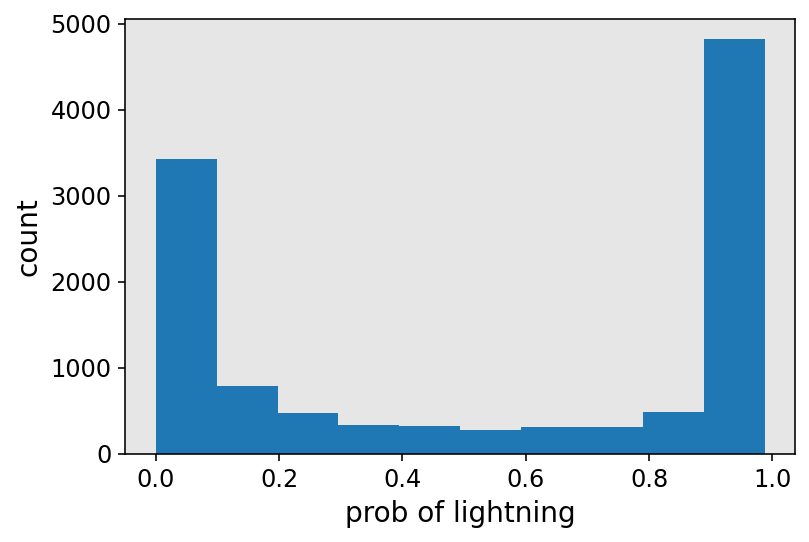

In [12]:
#like sklearn, we do .predict!
y_preds = model.predict(ds_val)

plt.hist(y_preds)
plt.xlabel('prob of lightning')
plt.ylabel('count')

Well this looks better than before, we can see there is a good number of near 1 values and near 0 values. Hopefully with the correct 'truth' labels. Let's take a look at that performance diagram again.

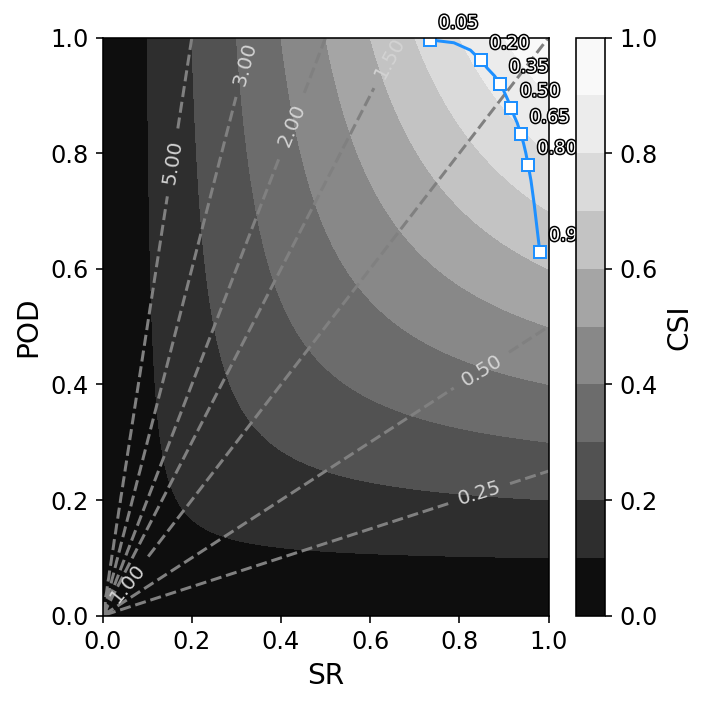

In [13]:
#probability threholds 
thresh = np.arange(0.05,1.05,0.05)

#statsitcs we need for performance diagram 
tp = tf.keras.metrics.TruePositives(thresholds=thresh.tolist())
fp = tf.keras.metrics.FalsePositives(thresholds=thresh.tolist())
fn = tf.keras.metrics.FalseNegatives(thresholds=thresh.tolist())

#get performance diagram line by getting tp,fp and fn 
tp.reset_state()
fp.reset_state()
fn.reset_state()

tps = tp(y_v,y_preds)
fps = fp(y_v,y_preds)
fns = fn(y_v,y_preds)

#calc x,y of performance diagram 
pods = tps/(tps + fns)
srs = tps/(tps + fps)
csis = tps/(tps + fns + fps)

#plot it up  
ax = make_performance_diagram_axis()
ax.plot(np.asarray(srs),np.asarray(pods),'-',color='dodgerblue',markerfacecolor='w',label='UNET')

for i,t in enumerate(thresh):
    #plot text and marker every 3rd point, because every point was too many
    if np.mod(i,3) == 0:
        text = np.char.ljust(str(np.round(t,2)),width=4,fillchar='0')
        ax.plot(np.asarray(srs)[i],np.asarray(pods)[i],'s',color='dodgerblue',markerfacecolor='w')
        ax.text(np.asarray(srs)[i]+0.02,np.asarray(pods)[i]+0.02,text,path_effects=pe1,fontsize=9,color='white')

plt.tight_layout()

MUCH BETTER. Even just a simple neural network here does well. This is probably because the task is somewhat easy, remember that we could use a simple brightness temperature threshold for IR to get an 80% accuracy. Just a note on the numbers being plotted on the plot. These are the probability thresholds used at each marker. So for this model the best performing (if we use CSI) probability to say "> this probability these groups are lightning" , "< this probability these groups don't have lightning".

Since this network is so small, we can actually take a look at the learned weights and biases, not that they will be meaniful to us, but you can look at them.

In [15]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(36, 2) dtype=float32, numpy=
 array([[-1.55337825e-01,  3.46964777e-01],
        [-1.02038145e-01,  3.59163672e-01],
        [ 2.13905454e-01,  2.62565285e-01],
        [-1.46155640e-01,  5.88695481e-02],
        [ 1.20497406e-01, -9.30148438e-02],
        [-2.20156953e-01, -1.11497484e-01],
        [-2.20726639e-01,  1.70682780e-02],
        [-1.12678796e-01, -1.13547407e-02],
        [-3.24822664e-01, -9.91298333e-02],
        [-1.47997946e-01,  2.60586381e-01],
        [-7.23532289e-02, -3.17085117e-01],
        [-2.80567110e-01, -1.32511696e-02],
        [ 6.56924322e-02, -5.02323359e-02],
        [ 2.23927066e-01, -5.56745604e-02],
        [ 5.75579643e-01,  1.18782580e-01],
        [ 9.67578664e-02, -2.00778097e-01],
        [-1.15805440e-01,  2.67483205e-01],
        [ 1.67067140e-01, -3.03277344e-01],
        [ 8.35941285e-02, -7.29657784e-02],
        [ 2.30207264e-01, -2.53861666e-01],
        [ 1.19015761e-01,  9.85671133e-02],
        [

In [16]:
model.layers[1].weights

[<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.2371206, 1.1020488],
        [1.6244591, 2.0011137]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([0.00047399, 0.00051893], dtype=float32)>]